Author: Geoff Boeing

Web: http://geoffboeing.com

Description: This notebook visualizes timestamped location data with matplotlib. More info: http://geoffboeing.com/2014/08/visualizing-summer-travels/

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from time import time
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Arial', style='normal', size=12, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Arial', style='normal', size=11, weight='normal', stretch='normal')

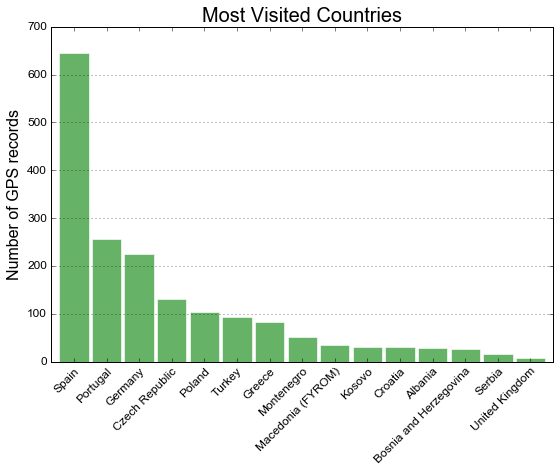

In [4]:
# plot a histogram of the countries I visited
countdata = df['country'].value_counts()
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='g',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 700])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

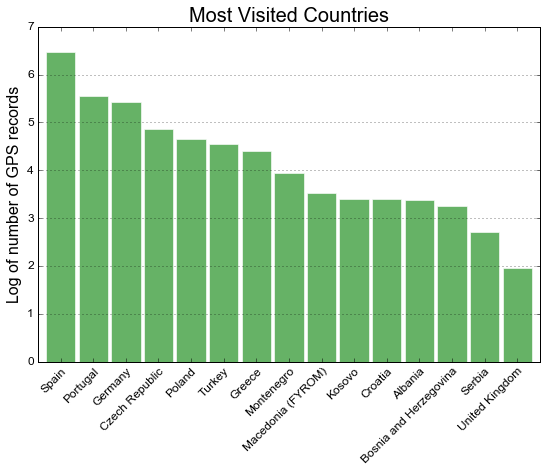

In [5]:
# let's re-scale that to make it look better
countdata = np.log(df['country'].value_counts())
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='g',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 7])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Log of number of GPS records', fontproperties=label_font)

plt.show()

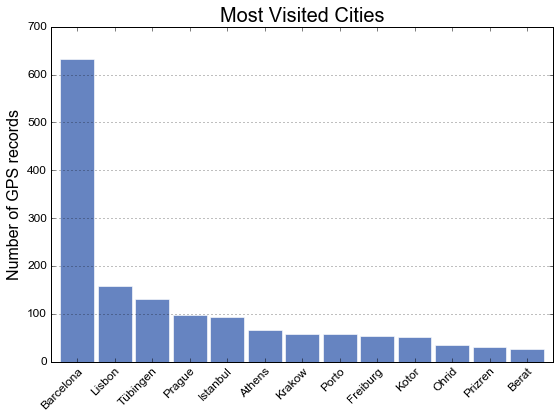

In [6]:
# plot a histogram of the cities I visited most
countdata = df['city'].value_counts().head(13)
xlabels = pd.Series(countdata.index)

ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 700])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

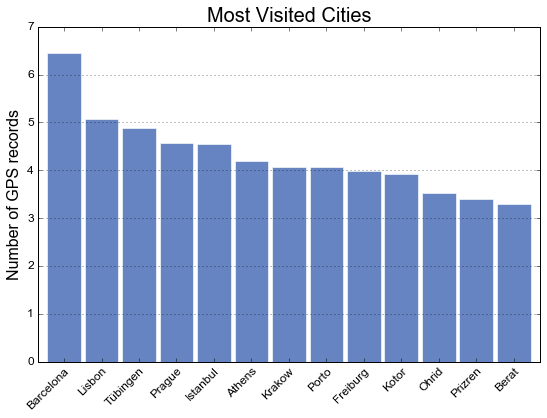

In [7]:
# let's re-scale that to make it look better
countdata = np.log(df['city'].value_counts().head(13))
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 7])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

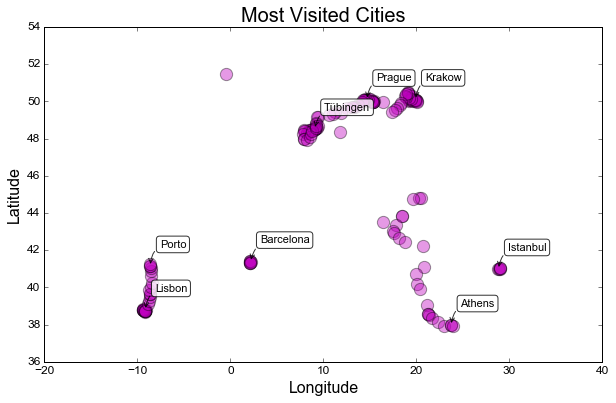

In [8]:
# get a representative point from the reduced data set for each of the most visited cities in the full set
most_index = df['city'].value_counts().head(8).index
most = pd.DataFrame(df[df['city'].isin(most_index)])
most.drop_duplicates(subset=['city'], keep='first', inplace=True)

# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate the most visited cities
for _, row in most.iterrows():
    ax.annotate(row['city'], 
                xy=(row['lon'], row['lat']),
                xytext=(row['lon'] + 1, row['lat'] + 1),
                fontproperties=annotation_font,
                bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.8),
                xycoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

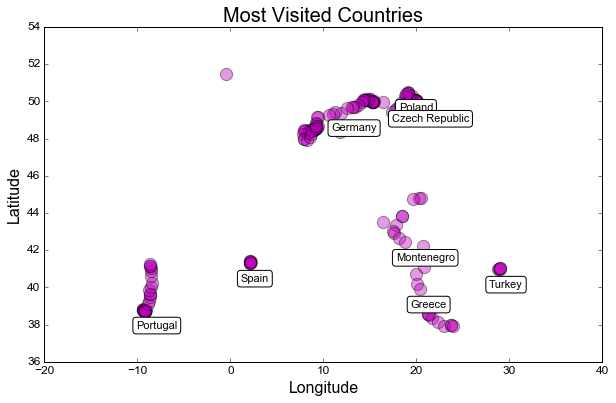

In [9]:
# get a representative point from the reduced data set for each of the most visited countries in the full set
most_index = df['country'].value_counts().head(8).index
most = pd.DataFrame(df[df['country'].isin(most_index)])
most.drop_duplicates(subset=['country'], keep='first', inplace=True)

# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate the most visited countries
for _, row in most.iterrows():
    ax.annotate(row['country'].decode('utf-8'), 
                xy=(row['lon'], row['lat']),
                xytext=(row['lon'] - 1, row['lat'] - 1),
                fontproperties=annotation_font,
                bbox=dict(boxstyle="round", fc="1"),
                xycoords='data')
plt.show()

In [10]:
# next we'll identify the most isolated points (or clusters of points, based on some threshold distance)
start_time = time()

# what is the distance to the nearest point that is at least *threshold* miles away?
# ie, ignore all other points within this distance when identifying the next nearest point
# this treats everything within this threshold distance as a single cluster
threshold = 20

# create two new columns in the dataframe of simplified coordinates
# nearest_point will contain the index of the row of the nearest point from the original full data set
# nearest_dist will contain the value of the distance between these two points
rs['nearest_point'] = None
rs['nearest_dist'] = None

# for each row (aka, coordinate pair) in the data set
for label, row in rs.iterrows():  
    
    point1 = (row['lat'], row['lon'])
    for label2, row2 in rs.iterrows():
        
        # don't compare the row to itself
        if(label != label2):
            
            # calculate the great circle distance between points            
            point2 = (row2['lat'], row2['lon'])
            dist = great_circle(point1, point2).miles

            # if this row's nearest is currently null, save this point as its nearest
            # or if this distance is smaller than the previous smallest, update the row
            if pd.isnull(rs.loc[label, 'nearest_dist']) | ((dist > threshold) & (dist < rs.loc[label, 'nearest_dist'])):
                rs.loc[label, 'nearest_dist'] = dist
                rs.loc[label, 'nearest_point'] = label2
            
print 'process took {:.2f} seconds'.format(time()-start_time)

process took 11.81 seconds


In [11]:
# sort the points by distance to nearest, then drop duplicates of nearest_point
most_isolated = rs.sort_values(by='nearest_dist', ascending=False).drop_duplicates(subset='nearest_point', keep='first')
most_isolated = most_isolated.head(5)
most_isolated

,lat,lon,date,city,country,nearest_point,nearest_dist
125,41.302957,2.075222,06/20/2014 18:59,Barcelona,Spain,114,542.344
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,111,426.518
155,41.014963,29.010762,07/07/2014 16:56,Istanbul,Turkey,151,343.924
137,42.208303,20.736178,06/30/2014 18:27,Prizren,Kosovo,138,75.6773
157,48.356285,11.791710,07/09/2014 13:17,Munich,Germany,87,72.0828


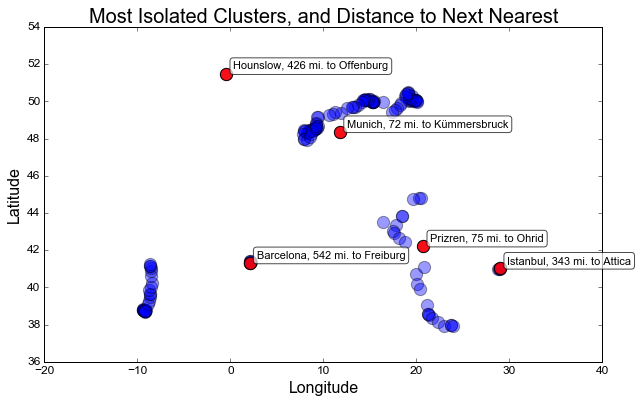

In [12]:
# plot the most isolated clusters in the data set
fig, ax = plt.subplots(figsize=[10, 6])

rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='b', alpha=0.4, s=150)
df_scatter = ax.scatter(most_isolated['lon'], most_isolated['lat'], c='r', alpha=0.9, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Most Isolated Clusters, and Distance to Next Nearest', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate each of the most isolated clusters with city name, and distance to next nearest point + its name
for _, row in most_isolated.iterrows():
    ax.annotate(row['city'] + ', ' + str(int(row['nearest_dist'])) + ' mi. to ' + rs['city'][row['nearest_point']], 
                xy=(row['lon'], row['lat']),
                xytext=(row['lon'] + 0.75, row['lat'] + 0.25),
                fontproperties=annotation_font,
                bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
                xycoords='data')
plt.show()

# Now we'll use geopandas, shapely, and geopy to manipulate and plot summer travel data

In [13]:
rs.head()

,lat,lon,date,city,country,nearest_point,nearest_dist
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,111,426.518
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal,19,26.19
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal,19,26.5909
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal,19,28.8349
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal,19,33.2993


In [14]:
#load the shapefile of all countries in the world
all_countries = GeoDataFrame.from_file('shapefiles/countries_shp/world_country_admin_boundary_shapefile_with_fips_codes.shp')
all_countries.head()

,CNTRY_NAME,FIPS_CNTRY,geometry
0,Aruba,AA,POLYGON ((-69.88223266601563 12.41110992431641...
1,Antigua & Barbuda,AC,(POLYGON ((-61.7388916015625 17.54055404663086...
2,United Arab Emirates,AE,(POLYGON ((56.28047180175781 24.85727310180664...
3,Afghanistan,AF,"POLYGON ((61.27655792236328 35.60724639892578,..."
4,Algeria,AG,POLYGON ((-5.152134895324707 30.18046951293945...


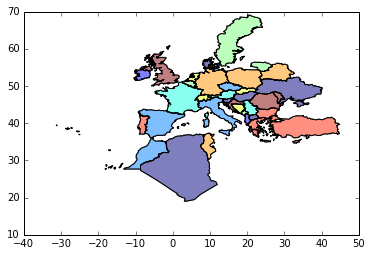

In [15]:
# define the coordinates at the extent of our point data for our map
margin_width = 4
lon_range = [rs['lon'].min() - margin_width, rs['lon'].max() + margin_width]
lat_range = [rs['lat'].min() - margin_width, rs['lat'].max() + margin_width]

# create a rectangle from these coordinates
spatial_extent = Polygon([(lon_range[0], lat_range[0]), 
                          (lon_range[0], lat_range[1]), 
                          (lon_range[1], lat_range[1]),
                          (lon_range[1], lat_range[0])])

# one way to get the shapes is with geopandas intersection, but that chops the shapes off at the extent
#countries = all_countries['geometry'].intersection(spatial_extent)

# another way to get the shapes is geopandas intersects, which pulls the full shape
# but let's remove russia because it's too big
countries = all_countries[all_countries['geometry'].intersects(spatial_extent)]
countries = countries[countries['CNTRY_NAME'] != 'Russia']

countries.plot()

In [16]:
# get a representative point for each of the most visited cities
most_index = df['city'].value_counts().head(6).index
most = pd.DataFrame(rs[rs['city'].isin(most_index)])
most.drop_duplicates(subset=['city'], keep='first', inplace=True)

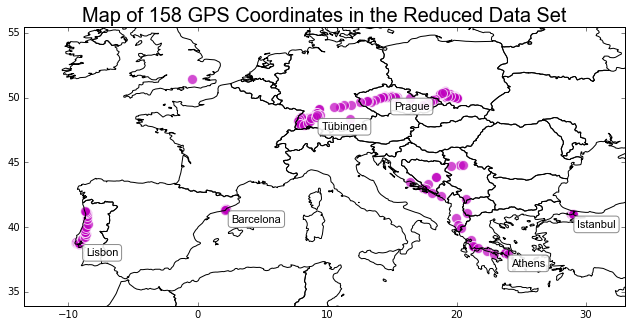

In [17]:
# draw a map of our point data on top of a basemap of country boundaries
fig = plt.figure()

# set the figure dimensions to the extent of the coordinates in our data
ydimension = int((lat_range[1] - lat_range[0]) / 4)
xdimension = int((lon_range[1] - lon_range[0]) / 4)
fig.set_size_inches(xdimension, ydimension)

# plot the country boundaries and then our point data
countries.plot(alpha=0)
rs_scatter = plt.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='w', alpha=0.7, s=100)

# annotate the most visited cities in the data set
for _, row in most.iterrows():
    plt.annotate(row['city'], 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 0.5, row['lat'] - 1),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.9),
                 xycoords='data')

# limit the coordinate space shown to the extent of our point data
plt.xlim(lon_range)
plt.ylim(lat_range)   

# set axis labels and title
plt.title('Map of {} GPS Coordinates in the Reduced Data Set'.format(len(rs)), fontproperties=title_font)

plt.show()

# Now draw some pie charts to show proportions

In [18]:
# function to produce more beautiful pie charts with matplotlib
def gbplot_pie(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = '%1.1f%%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what the label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cutoff value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cutoff value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

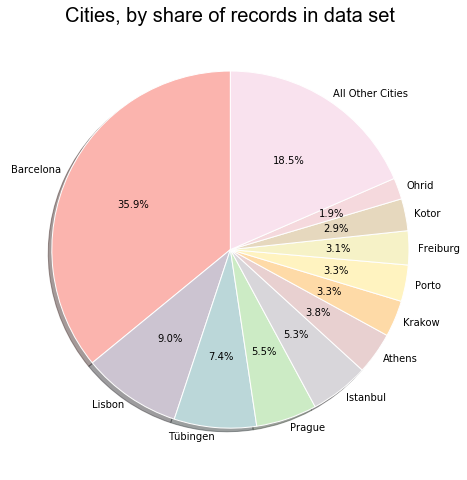

In [19]:
countdata = df['city'].value_counts()
gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Cities, by share of records in data set',
           grouping_threshold = 30,
           grouping_label = 'All Other Cities')

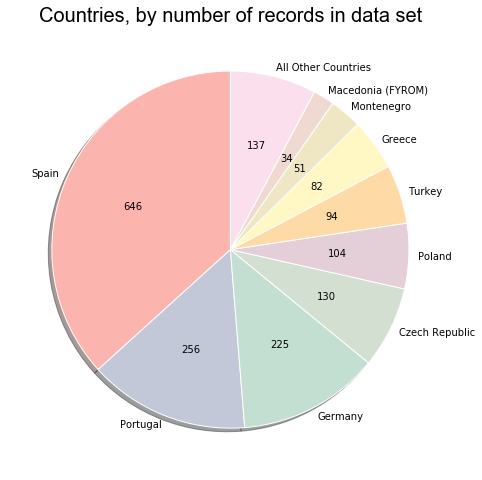

In [20]:
countdata = df['country'].value_counts()

# convert the pie wedge percentage into its absolute value
def my_autopct(pct):
    total = sum(countdata)
    val = int(round(pct*total)/100.0000)
    return '{v:d}'.format(v=val)

gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Countries, by number of records in data set',
           autopct=my_autopct,
           grouping_threshold = 30,
           grouping_label = 'All Other Countries')

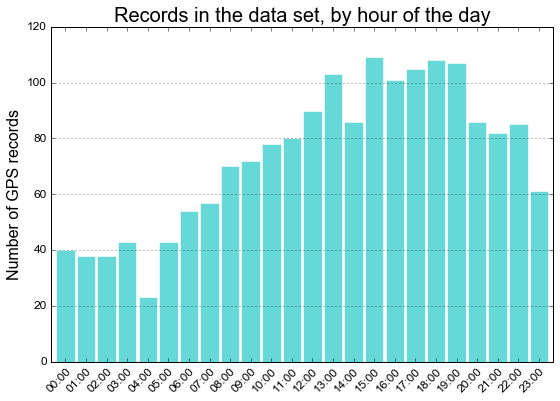

In [21]:
# plot a histogram of the GPS records by hour
countdata = df.groupby(df.index.hour).size()
countdata.index = ['{:02}:00'.format(hour) for hour in countdata.index]

ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6,
                    color='c',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 120])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Records in the data set, by hour of the day', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

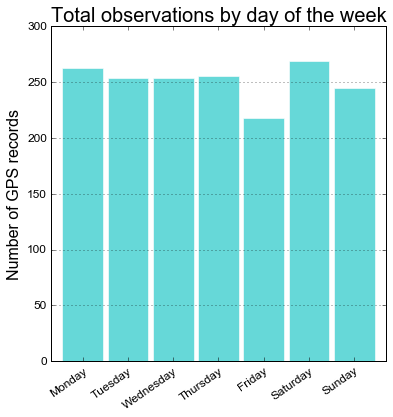

In [22]:
# plot a histogram of the GPS records by day of week
countdata = df.groupby(df.index.weekday).size()
countdata.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = countdata.plot(kind='bar',                 
                    figsize=[6, 6], 
                    width=0.9, 
                    alpha=0.6,
                    color='c',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 300])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Total observations by day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

In [23]:
# lots of rows from this day in the balkans - why?
date = dt.strptime('2014-06-28', '%Y-%m-%d').date()
day_records = df[df.index.date==date]
print len(day_records)

day_records.head()

38


,lat,lon,city,country
date,,,,
2014-06-28 00:09:00,42.423405,18.771601,Kotor,Montenegro
2014-06-28 02:39:00,42.423401,18.771603,Kotor,Montenegro
2014-06-28 03:09:00,42.423368,18.771646,Kotor,Montenegro
2014-06-28 03:39:00,42.423407,18.771575,Kotor,Montenegro
2014-06-28 05:09:00,42.423295,18.771617,Kotor,Montenegro


Ah, I had wifi in Kotor so more signals got through

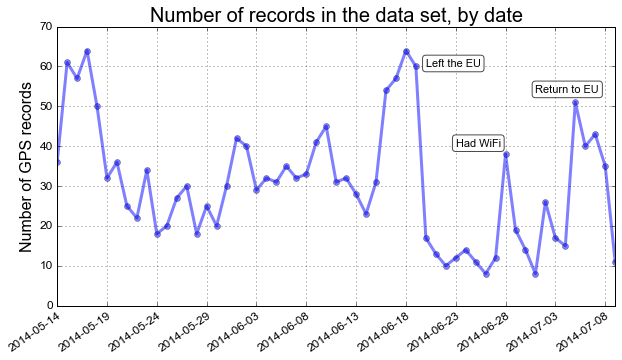

In [24]:
# plot a chart of records by date
countdata = df.groupby(df.index.date).size()
fig, ax = plt.subplots()

# create the line plot
ax = countdata.plot(kind='line',
                    figsize=[10, 5],
                    linewidth='3', 
                    alpha=0.5,
                    marker='o',
                    color='b')

# annotate the points around the balkans, for explanation
ax.annotate('Left the EU', 
            xy=('2014-06-20', 60),
            fontproperties=annotation_font,
            bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
            xycoords='data')

ax.annotate('Had WiFi', 
            xy=('2014-06-23', 40),
            fontproperties=annotation_font,
            bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
            xycoords='data')

ax.annotate('Return to EU', 
            xy=('2014-07-01', 53.5),
            fontproperties=annotation_font,
            bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
            xycoords='data')

# set the x-ticks/labels for every nth row of the data - here, 1 tick mark per horizontal inch
n = len(countdata) / int(fig.get_size_inches()[0])
xtick_data = countdata.iloc[range(0, len(countdata), n)]
ax.xaxis.set_ticks(xtick_data.index)
ax.grid()

# set tick labels, axis labels, and title
ax.set_xticklabels(xtick_data.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Number of records in the data set, by date', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()